# Alucar - Análise de Vendas

In [36]:
import pandas as pd

In [37]:
alucar = pd.read_csv('data/alucar.csv')

In [38]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [39]:
print(f'{alucar.shape[0]} linhas e {alucar.shape[1]} colunas.')

24 linhas e 2 colunas.


In [40]:
print('Dados nulos: ', alucar.isna().sum().sum())

Dados nulos:  0


In [41]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [42]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [43]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [44]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

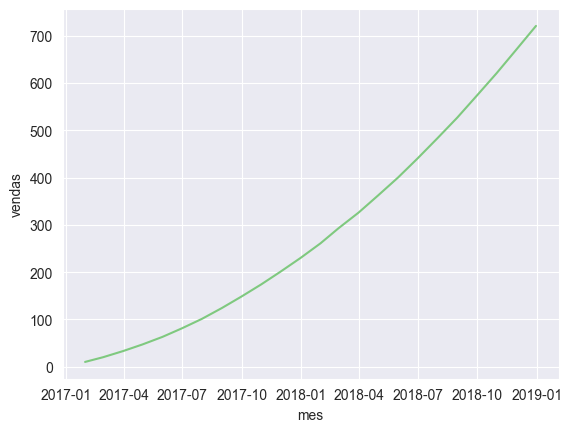

In [45]:
sns.lineplot(alucar, x='mes', y='vendas')

In [46]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

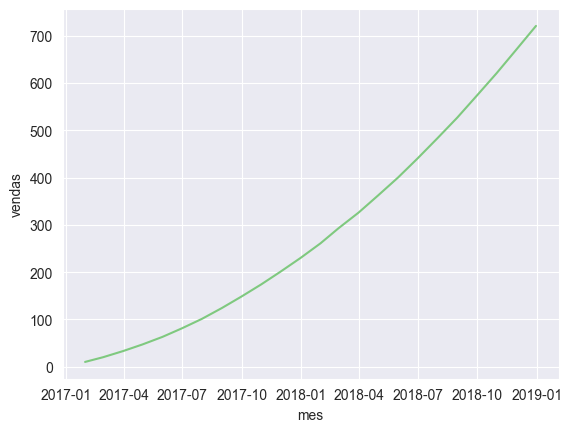

In [47]:
alucar_linha = sns.lineplot(alucar, x='mes', y='vendas')

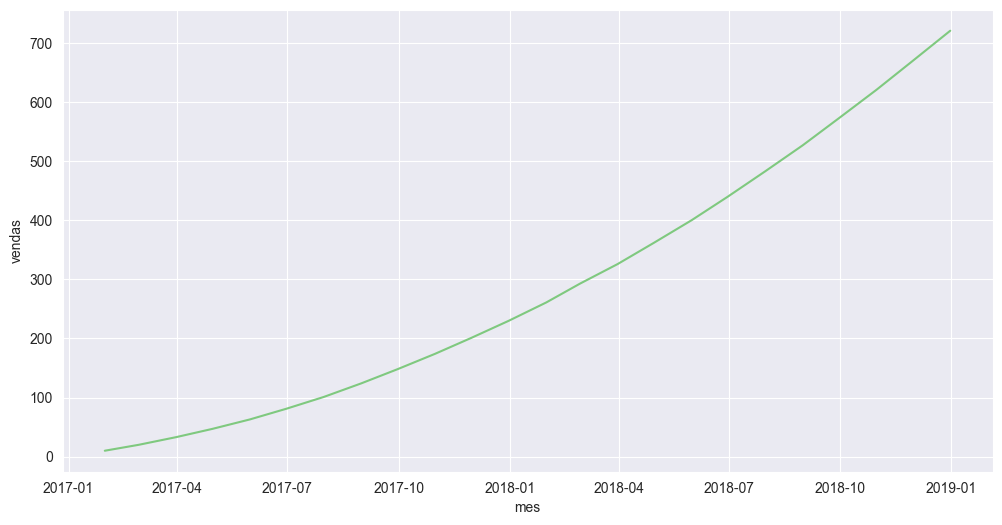

In [48]:
alucar_linha.figure.set_size_inches(12,6)
alucar_linha.figure

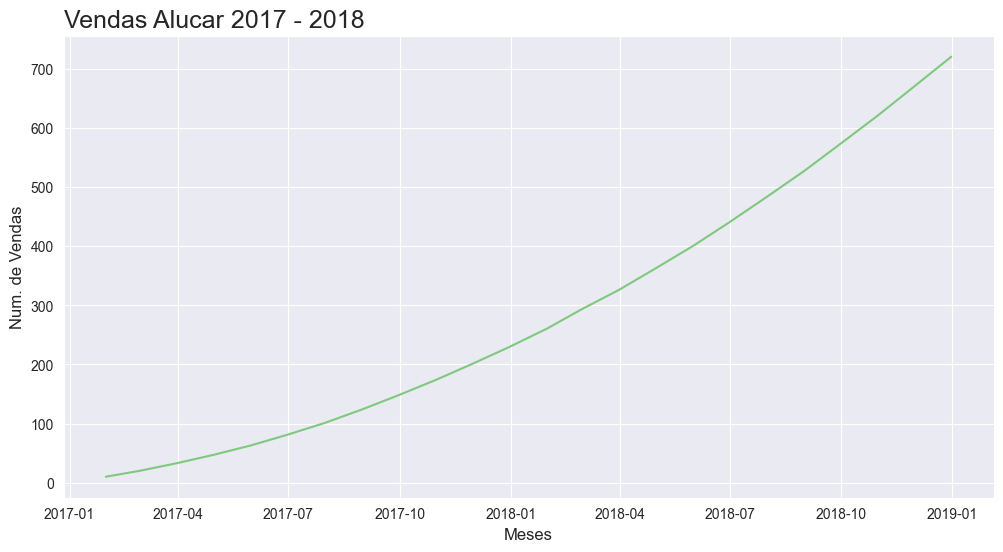

In [53]:
alucar_linha.set_title('Vendas Alucar 2017 - 2018', loc='left', fontsize=18)
alucar_linha.set_xlabel('Meses', fontsize = 12)
alucar_linha.set_ylabel('Num. de Vendas', fontsize = 12)
alucar_linha.figure